# Stock Prediction Model
Using Deep Learning with LSTM | By Subham Pramanick

## Introduction

In this project, we are aiming to predict the closing prices of a particular stock using a Long Short-Term Memory (LSTM) neural network model. LSTM models are a type of recurrent neural network (RNN) specifically designed to handle sequential data and are widely used in time series forecasting tasks. Our goal is to develop a predictive model that could accurately forecast the closing prices of a stock based on historical data, thereby assisting investors in making informed decisions regarding their investments.

## Business Problem

The business problem addressed in this project revolves around the need for accurate and reliable stock price predictions. Investors, traders, and financial analysts rely heavily on accurate forecasts to make informed decisions regarding buying, selling, or holding stocks. However, predicting stock prices is inherently challenging due to the complex and dynamic nature of financial markets. Traditional statistical methods often struggle to capture the intricate patterns and dependencies present in financial time series data. Therefore, the use of advanced machine learning techniques like LSTM models presents an opportunity to improve the accuracy of stock price predictions and enhance investment decision-making processes.

# 1.  What was the change in price & volume of the stocks overtime?

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

## Getting the Data from Yahoo Finance

We fetch stock data from Yahoo Finance for major financial institutions and banks. We define a list of stock symbols for companies like JPMorgan Chase, Goldman Sachs, etc. We set the start and end dates for data fetching, and then loop through each stock symbol to download the stock data using the yfinance library. We store the data in a dictionary and concatenate all DataFrames into a single DataFrame for further analysis.

In [ ]:
# Read stock data from Yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd

yf.pdr_override()

# From Time stamps
from datetime import datetime

# The global financial institutions and banks stocks we'll use for this analysis
FIB_list = ['JPM', 'GS', 'MS', 'C', 'UBS']

# Set up End and Start time for data fetching
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# Fetch and store stock data for each company
stock_data = {}
for stock_symbol in FIB_list:
    stock_data[stock_symbol] = yf.download(stock_symbol, start, end)

# Create a list to store the company names
FIB_name = ["JPMorgan Chase", "Goldman Sachs", "Morgan Stanley", "Citigroup", "UBS Group"]

# Add a new column 'FIB_name' to each DataFrame
for stock_symbol, company_name in zip(FIB_list, FIB_name):
    stock_data[stock_symbol]["FIB_name"] = company_name

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(stock_data.values(), keys=stock_data.keys(), names=["Stock", "Date"])

# Reset the index to make 'Stock' and 'Date' regular columns
df.reset_index(inplace=True)

# Display the first 10 rows of the resulting DataFrame
df.head(10)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Stock,Date,Open,High,Low,Close,Adj Close,Volume,FIB_name
0,JPM,2022-02-07,153.270004,153.619995,150.850006,153.070007,144.066696,12572300,JPMorgan Chase
1,JPM,2022-02-08,155.000000,158.479996,154.800003,155.949997,146.777267,20411400,JPMorgan Chase
2,JPM,2022-02-09,156.589996,157.429993,155.820007,156.600006,147.389069,9131100,JPMorgan Chase
3,JPM,2022-02-10,156.660004,159.029999,155.220001,155.949997,146.777267,16455600,JPMorgan Chase
4,JPM,2022-02-11,155.610001,158.190002,152.970001,153.919998,144.866699,16830000,JPMorgan Chase
5,JPM,2022-02-14,152.729996,153.679993,150.320007,152.490005,143.520798,17026500,JPMorgan Chase
6,JPM,2022-02-15,154.509995,155.940002,153.850006,154.720001,145.619614,9500000,JPMorgan Chase
7,JPM,2022-02-16,153.740005,156.100006,153.740005,155.000000,145.883163,9076500,JPMorgan Chase
8,JPM,2022-02-17,153.000000,153.729996,150.669998,151.429993,142.523148,11367500,JPMorgan Chase
9,JPM,2022-02-18,152.130005,154.139999,151.130005,152.139999,143.191376,11733300,JPMorgan Chase


In [ ]:
df.tail(10)

,Stock,Date,Open,High,Low,Close,Adj Close,Volume,FIB_name
2495,UBS,2024-01-23,28.980000,29.041000,28.760000,28.930000,28.930000,2707300,UBS Group
2496,UBS,2024-01-24,29.559999,29.665001,29.440001,29.500000,29.500000,2800500,UBS Group
2497,UBS,2024-01-25,29.770000,29.775000,29.530001,29.690001,29.690001,2402700,UBS Group
2498,UBS,2024-01-26,29.860001,29.924999,29.740000,29.870001,29.870001,2364300,UBS Group
2499,UBS,2024-01-29,29.730000,29.969999,29.629999,29.969999,29.969999,2555900,UBS Group
2500,UBS,2024-01-30,30.070000,30.260000,29.900000,30.230000,30.230000,2373700,UBS Group
2501,UBS,2024-01-31,30.330000,30.490000,29.895000,29.910000,29.910000,2031600,UBS Group
2502,UBS,2024-02-01,29.450001,29.575001,29.059999,29.510000,29.510000,3032800,UBS Group
2503,UBS,2024-02-02,29.469999,29.905001,29.469999,29.840000,29.840000,1995800,UBS Group
2504,UBS,2024-02-05,29.540001,29.549999,29.295000,29.455000,29.455000,820435,UBS Group


## Get Familiar with the data

In [ ]:
# Summary Stats
stock_data['UBS'].describe().transpose().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
Open,501.00,20.50,4.10,13.88,17.25,19.81,22.11,31.09
High,501.00,20.67,4.12,14.14,17.42,19.93,22.22,31.40
Low,501.00,20.33,4.11,13.80,16.96,19.60,22.04,30.92
Close,501.00,20.51,4.12,13.99,17.26,19.85,22.16,31.19
Adj Close,501.00,20.19,4.29,13.63,16.75,19.59,22.12,31.19
Volume,501.00,3513031.21,2728630.92,820435.00,2131200.00,2862600.00,4026400.00,40634500.00


We have 502 records in two year because weekends are not included in the data

In [ ]:
# Getting info
stock_data['UBS'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-02-07 to 2024-02-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
 6   FIB_name   501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


1. Open: The starting price of the stock.

2. High: The highest price it reached.

3. Low: The lowest price it went.

4. Close: The price of the stock before the market closed.

5. Adj Close (Adjusted Close): The closing price considering all changes.

6. Volume: How much of it was traded.

We now visualize the historical trend of closing prices and volumes for the selected financial institutions and banks. It plots the adjusted closing prices over time, providing insights into the performance and volatility of each company's stock. The plot is organized into subplots for each company, allowing for easy comparison. This visualization helps in identifying patterns, trends, and anomalies in the stock prices over the specified period.

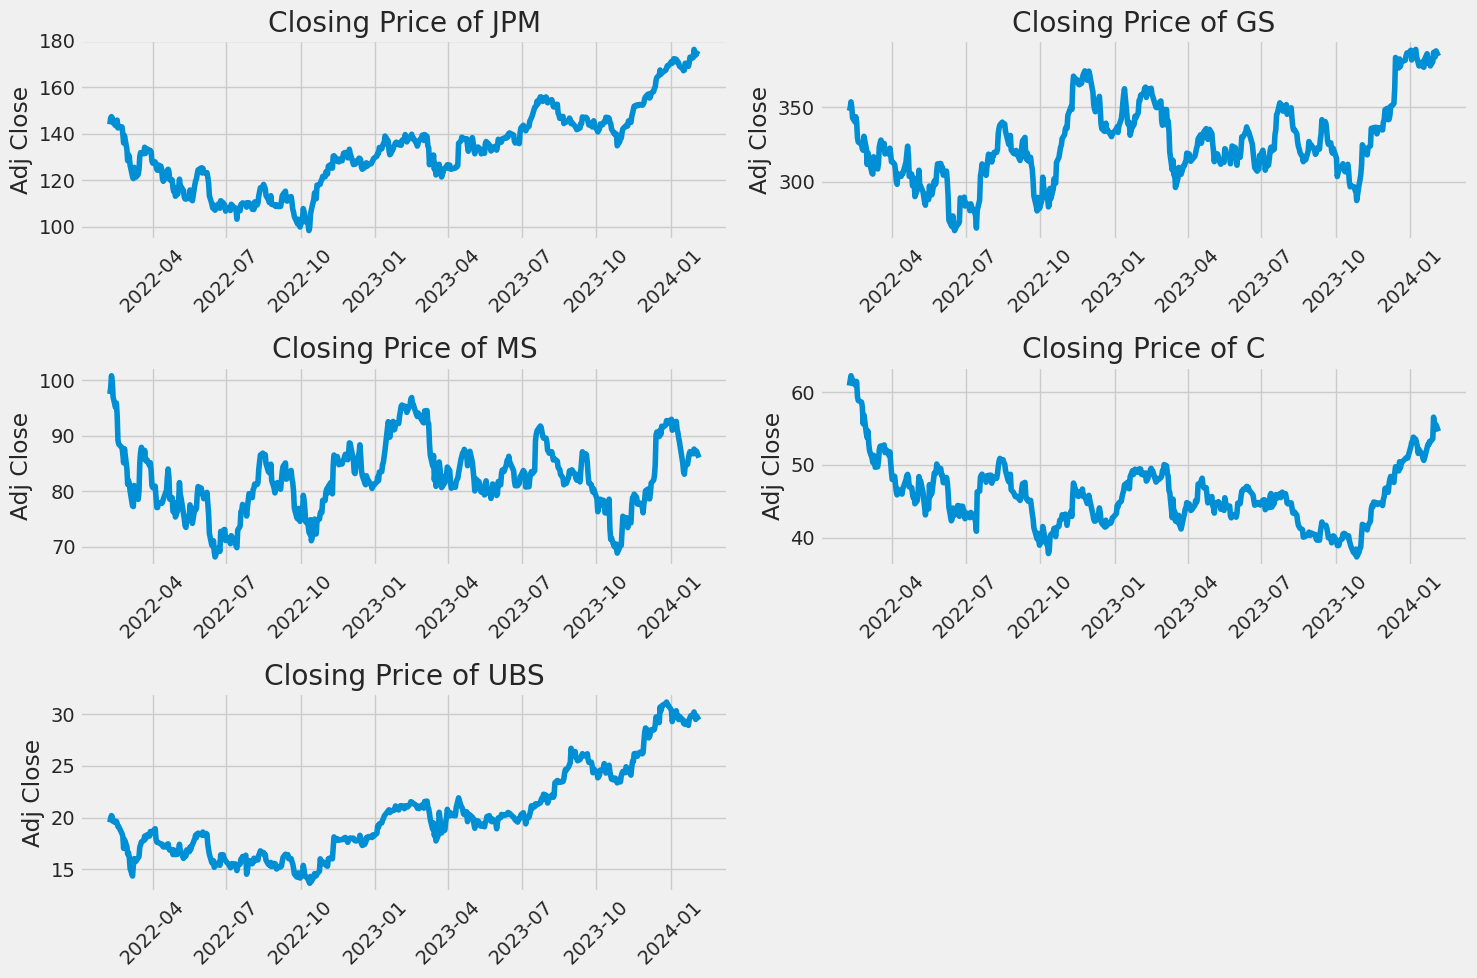

In [ ]:
# Let's see a historical view of the closing price and volume
# For Closing Price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(FIB_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(df[df['Stock'] == company]['Date'], df[df['Stock'] == company]['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

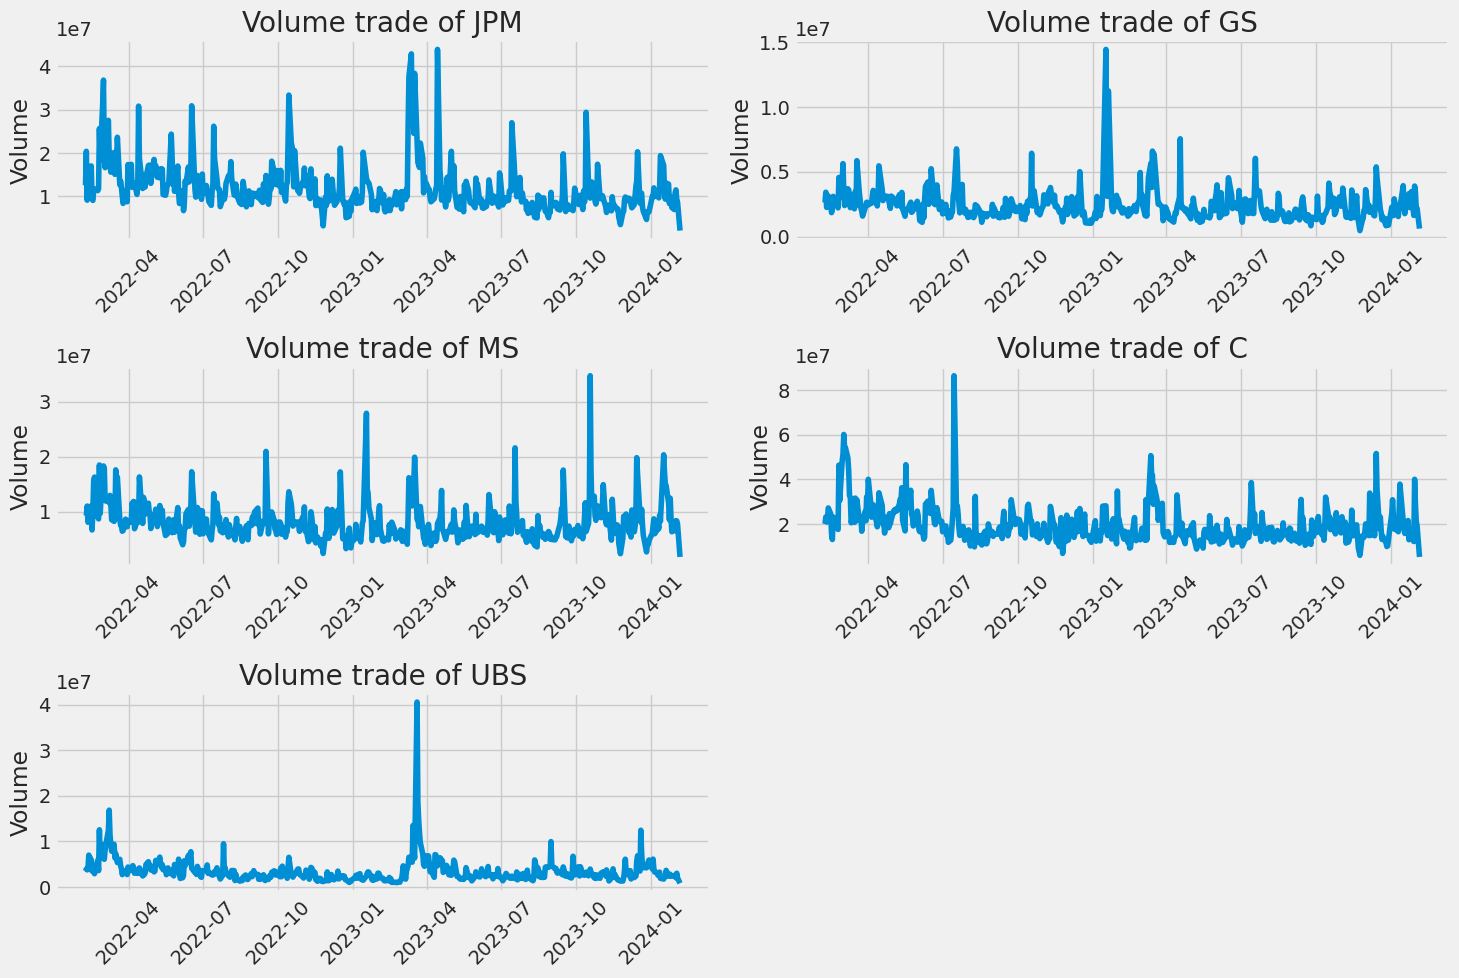

In [ ]:
# For Volume

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(FIB_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(df[df['Stock'] == company]['Date'], df[df['Stock'] == company]['Volume'])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume trade of {company}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

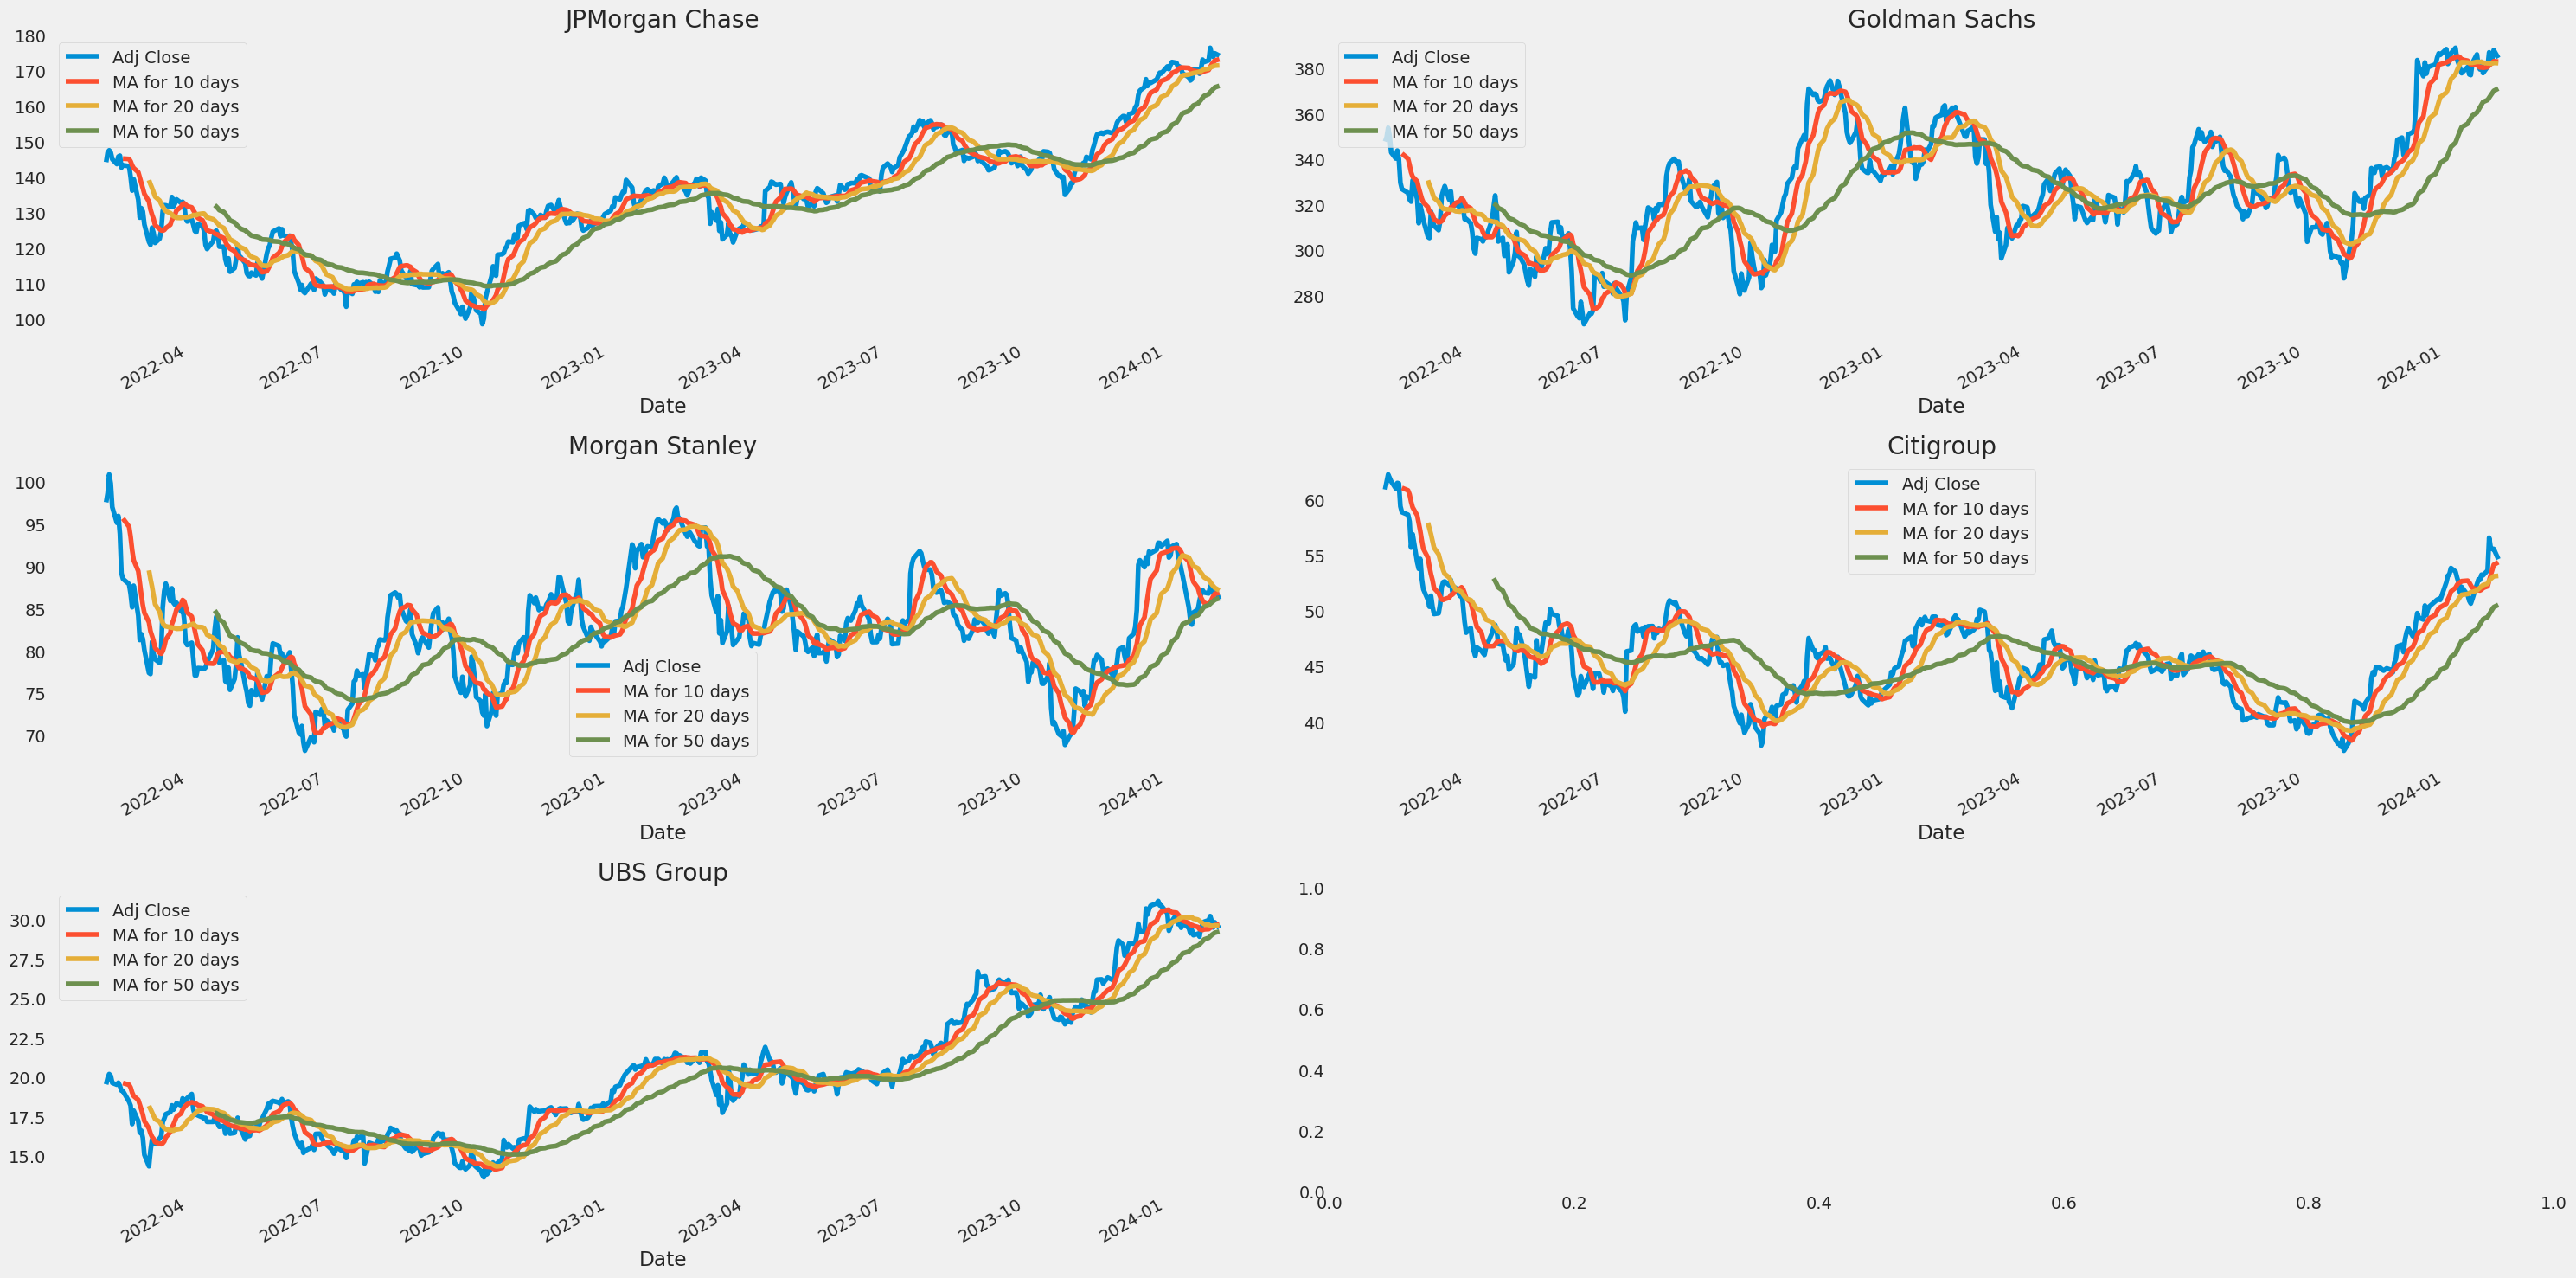

In [ ]:
ma_day = [10, 20, 50]

# Create a figure with subplots and increase figure height
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
fig.tight_layout()

# Iterate through companies and moving averages
for i, company in enumerate(FIB_list):
    # Calculate moving averages
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        stock_data[company][column_name] = stock_data[company]['Adj Close'].rolling(ma).mean()

    # Plot the relevant columns for each company
    stock_data[company][['Adj Close'] + [f'MA for {ma} days' for ma in ma_day]].plot(ax=axes[i // 2, i % 2], title=FIB_name[i])

# Remove gridlines from all subplots
for ax in axes.flat:
    ax.grid(False)

# Adjust subplot layout
fig.tight_layout()
plt.show()

**Choosing Moving Averages**

The choice of 10, 20, and 50-day moving averages (MA) is appropriate for analyzing stock price trends over short, medium, and long-term periods, respectively. The 10-day MA provides a short-term perspective, capturing recent price movements and helping traders identify short-term trends or reversals. The 20-day MA offers a medium-term view, smoothing out short-term fluctuations while still reflecting recent price changes. The 50-day MA represents a longer-term trend, filtering out short-term noise and providing insights into the stock's overall direction over a more extended period. Together, these moving averages offer a comprehensive analysis of stock price behavior across different time horizons, aiding in trend identification and decision-making for investors and traders.

And, We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

This code below calculates and visualizes the daily percentage change in adjusted closing prices for each stock. The resulting plots provide insights into the daily volatility and price movements of financial institutions and banks. This analysis aids in risk assessment, portfolio management, and identifying market opportunities or risks.

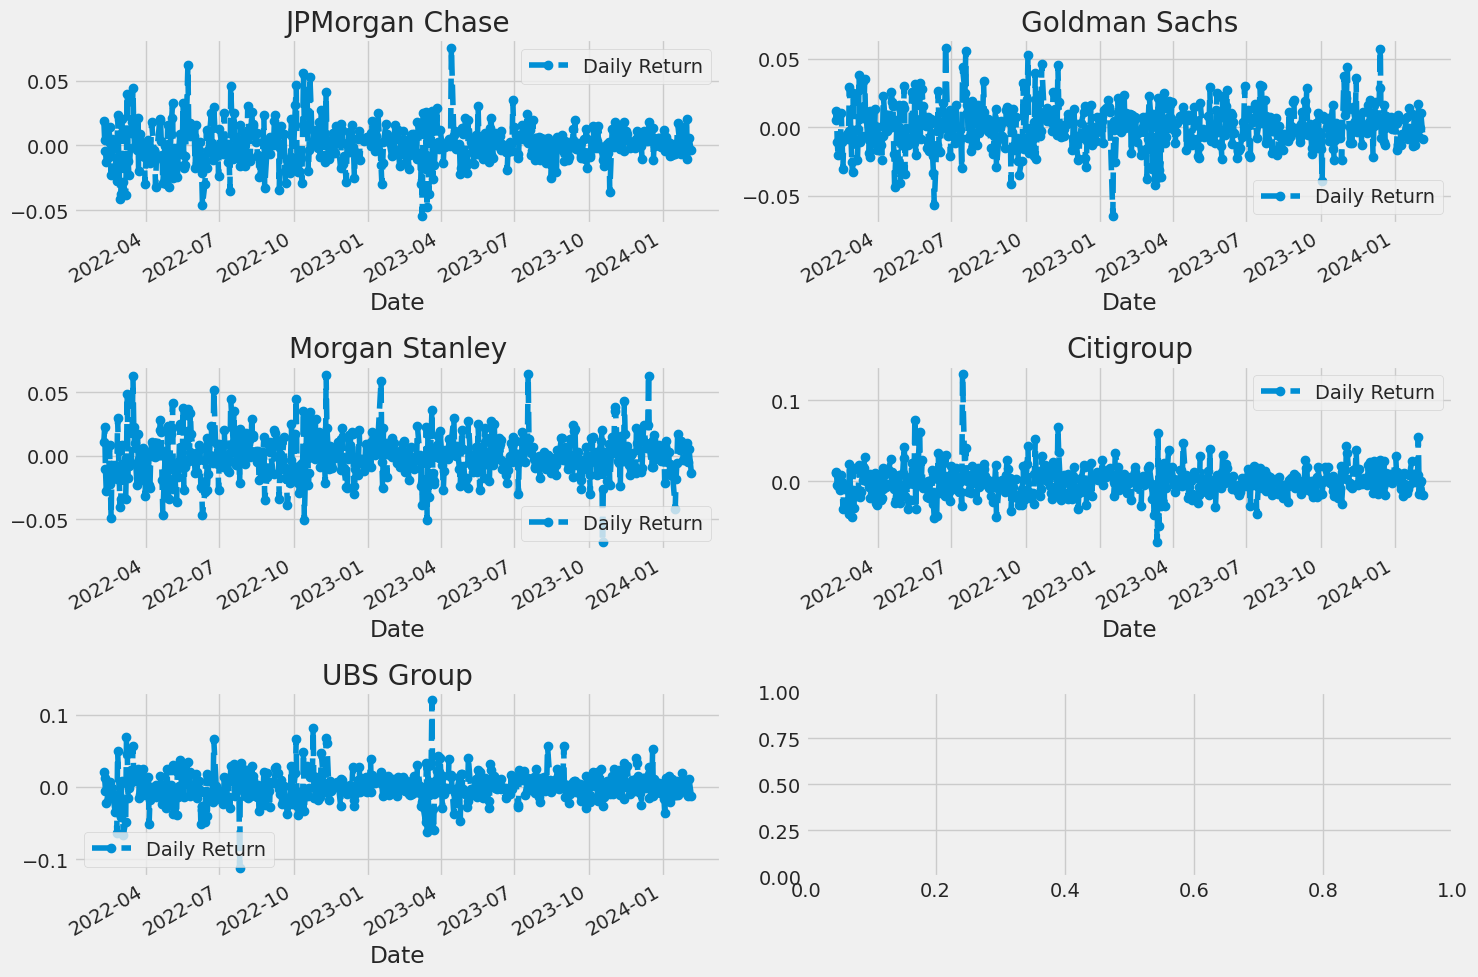

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in FIB_list:
    stock_data[company]['Daily Return'] = stock_data[company]['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.tight_layout()

for i, (company, company_name) in enumerate(zip(FIB_list, FIB_name)):
    row = i // 2
    col = i % 2
    stock_data[company]['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(company_name)

# Add legend at the bottom left
axes[-1, 0].legend(loc='lower left')

fig.tight_layout()
plt.show()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and Kernel Density Estimation plot on the same figure later in the script. By examining the distribution of daily returns, investors can better understand the frequency and magnitude of price changes, aiding in risk assessment and decision-making.

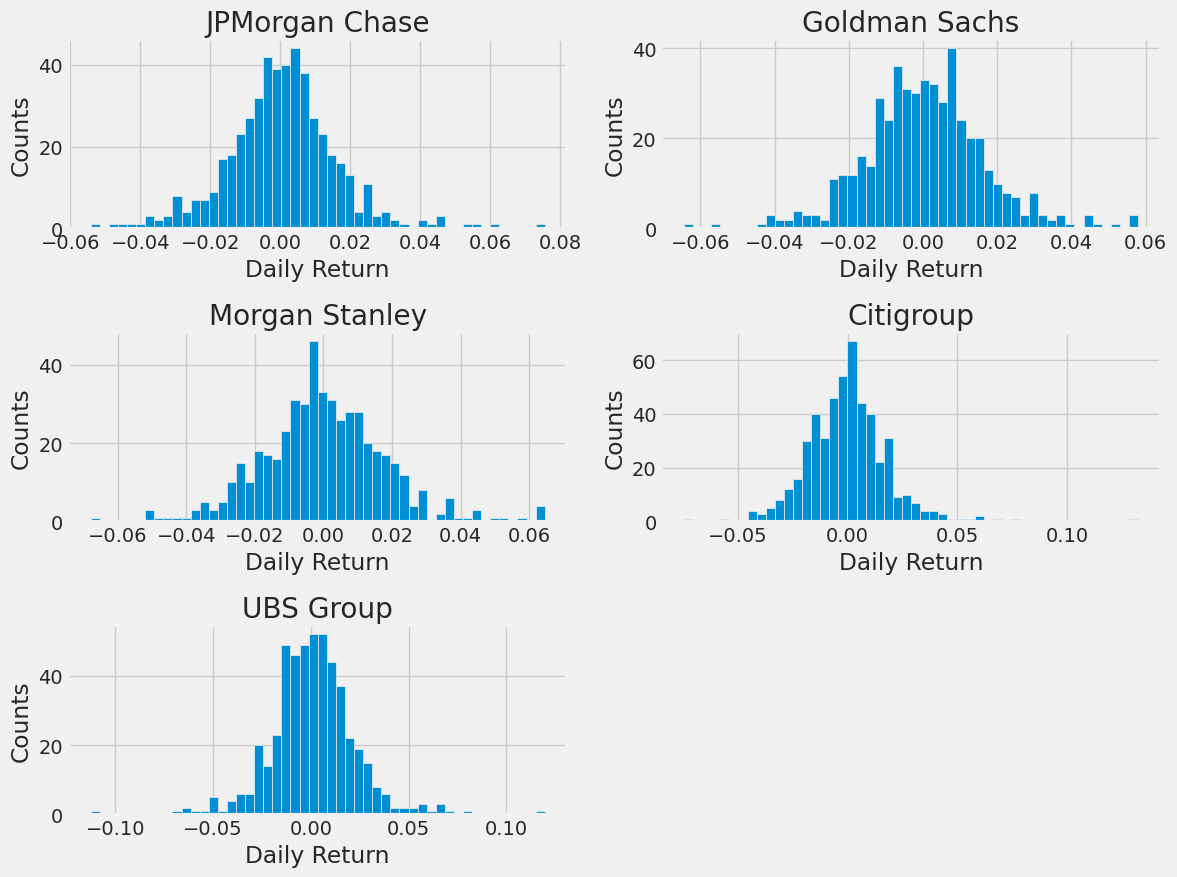

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(FIB_list, 1):
    plt.subplot(3, 2, i)
    stock_data[company]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{FIB_name[i - 1]}')

plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?
This process is crucial in a stock price prediction project as it allows us to analyze the historical relationships between different stocks. Understanding the correlations between stock prices helps in identifying patterns, dependencies, and potential impacts on the prediction models.

In [ ]:
# Grab all the closing prices for the FIB stock list into one DataFrame

closing_df = pdr.get_data_yahoo(FIB_list, start=start, end=end)['Adj Close']

# Make a new FIB returns DataFrame
FIB_ret = closing_df.pct_change()
FIB_ret.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,C,GS,JPM,MS,UBS
Date,,,,,
2022-02-07,NaN,NaN,NaN,NaN,NaN
2022-02-08,0.011453,0.005297,0.018815,0.011124,0.020864
2022-02-09,0.010727,0.011970,0.004168,0.022379,0.012357
2022-02-10,-0.005012,-0.010573,-0.004151,-0.010669,-0.005634
2022-02-11,-0.005185,-0.020266,-0.013017,-0.027889,-0.022191


Now we can compare the daily percentage return of two stocks to check how correlated.

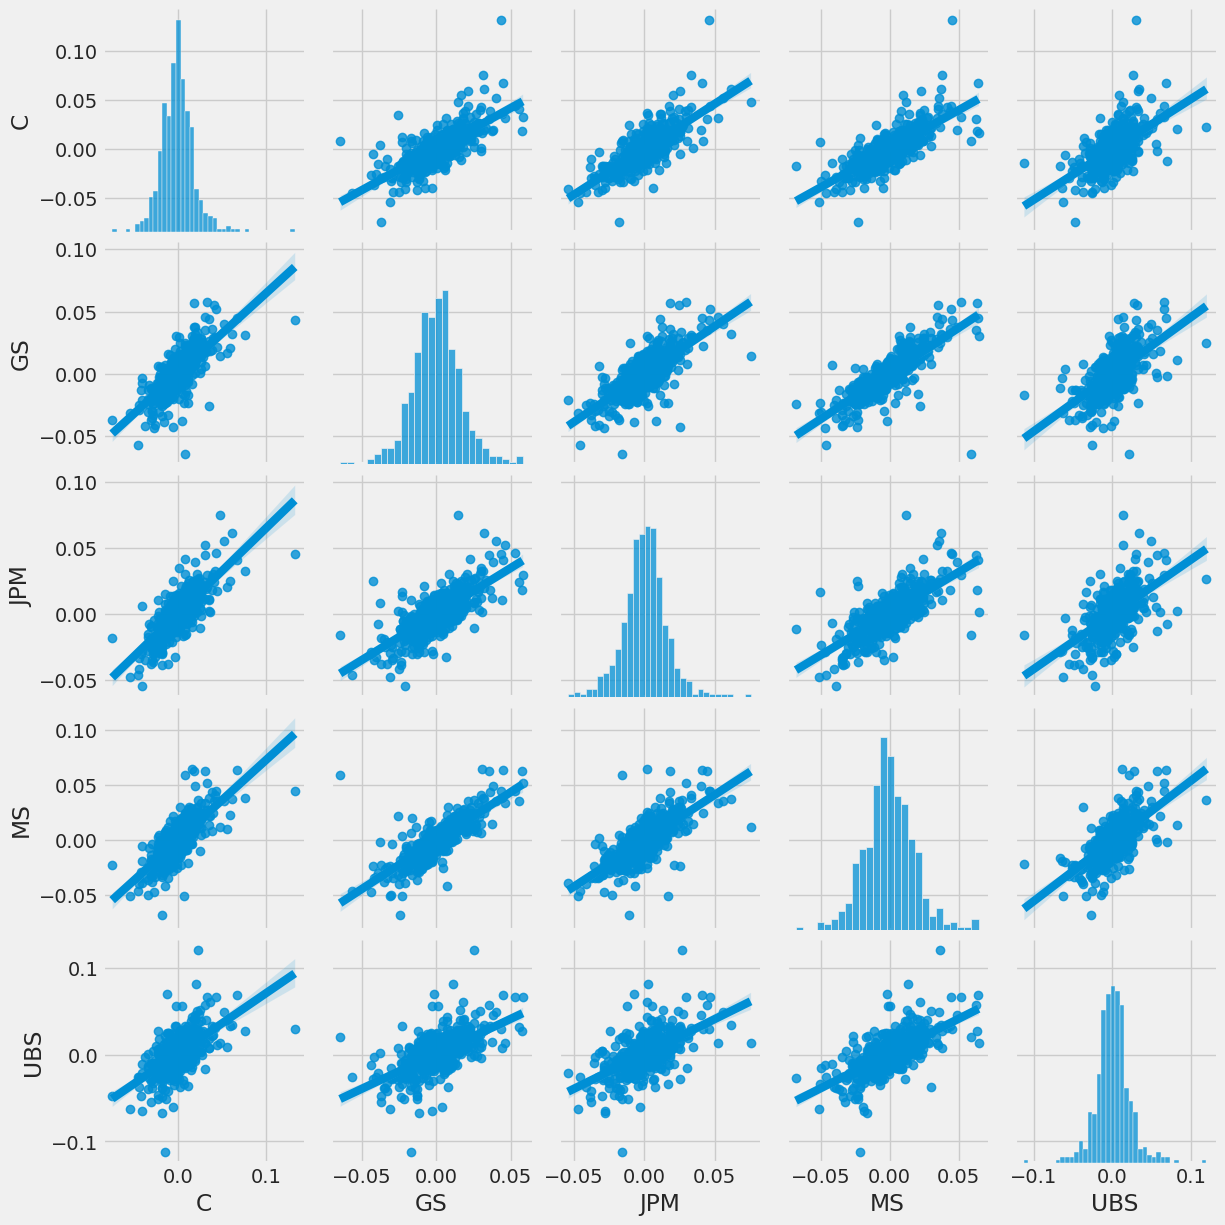

In [ ]:
# Pairplot our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(FIB_ret, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Goldmann Sachs and Morgan Stanley daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Let's try the full potential of seaborn in the below code.

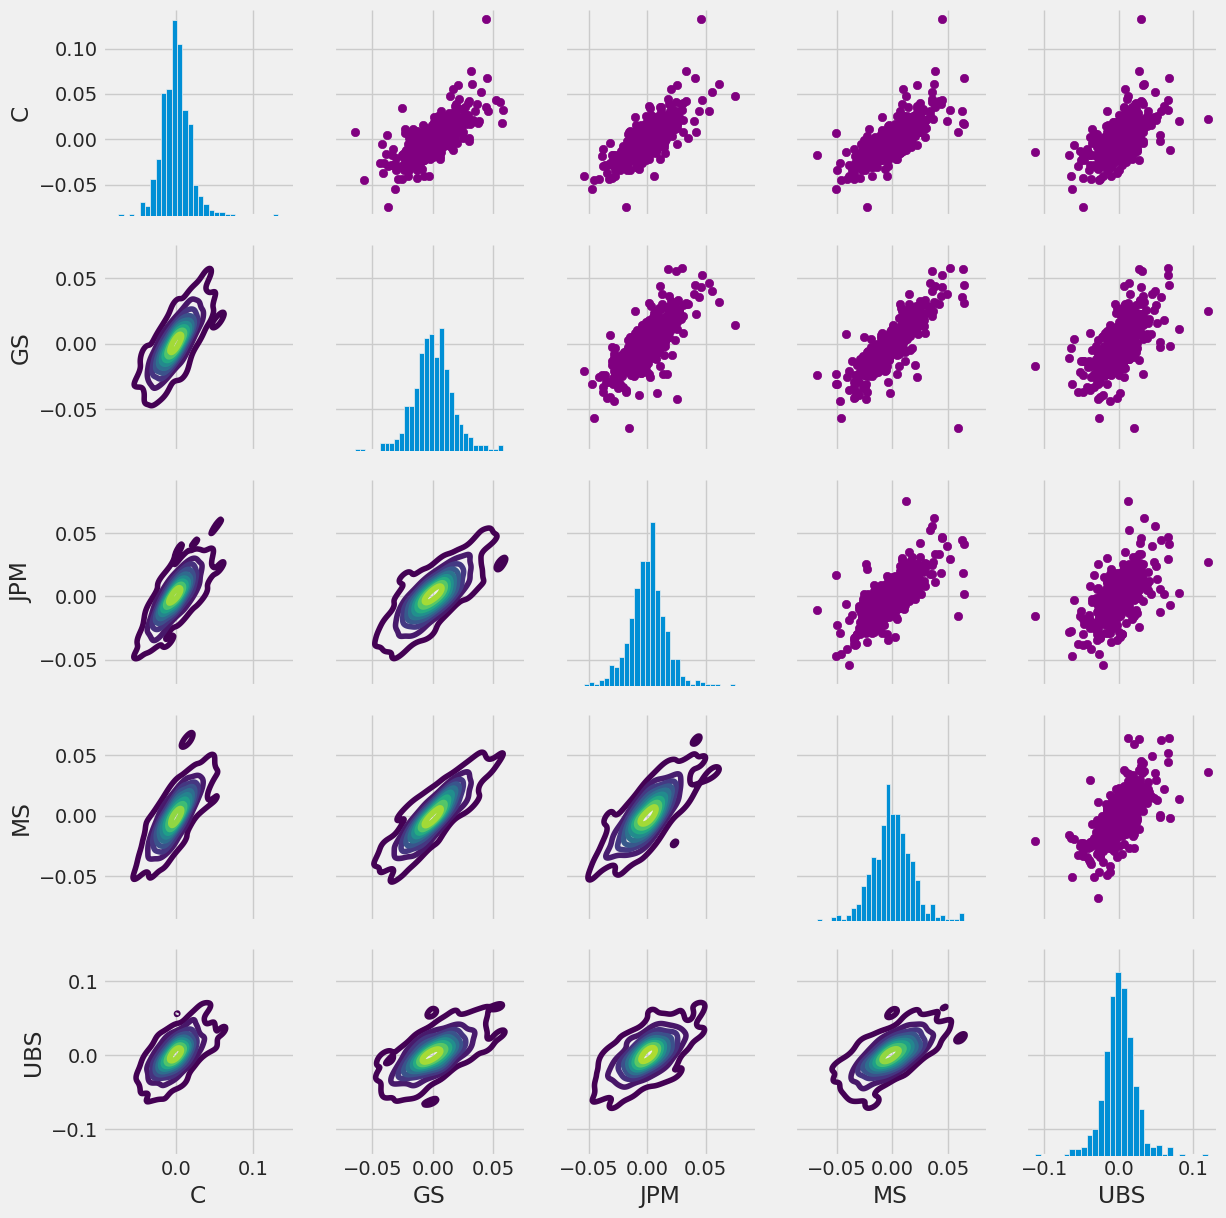

In [ ]:
# Let,
return_fig = sns.PairGrid(FIB_ret.dropna())

# Customizing Upper Map
return_fig.map_upper(plt.scatter, color="purple")

# Customizing Lower Map by including KDE
return_fig.map_lower(sns.kdeplot, cmap='viridis')

# Customizing the diagonal as histogram plots
return_fig.map_diag(plt.hist, bins=30)

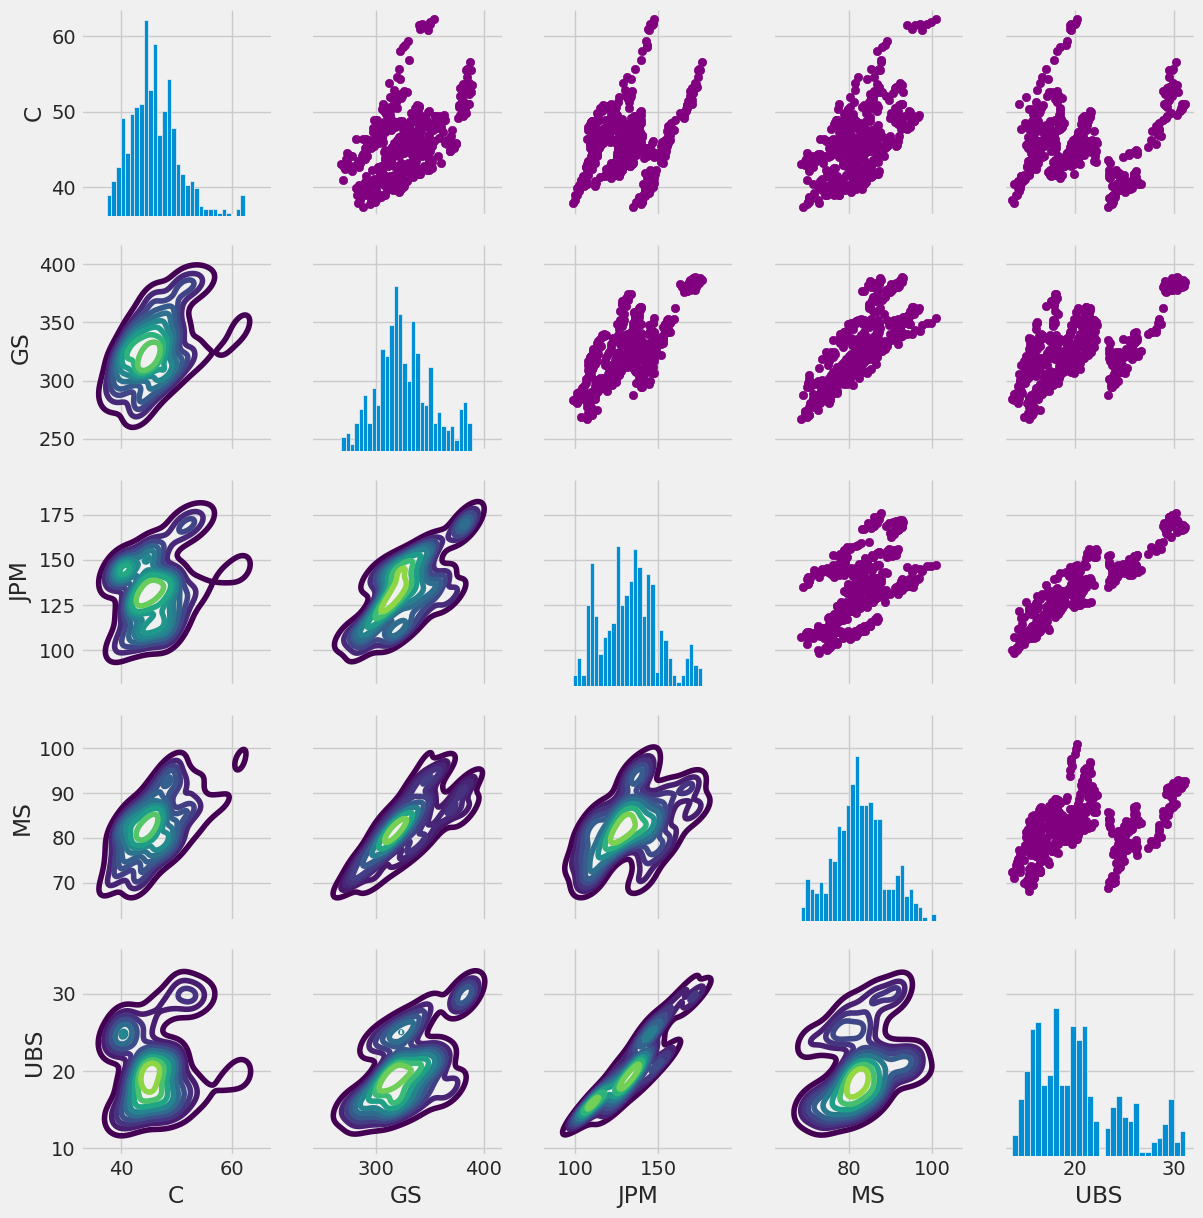

In [ ]:
# Let,
close_fig = sns.PairGrid(closing_df.dropna())

# Customizing Upper Map
close_fig.map_upper(plt.scatter, color="purple")

# Customizing Lower Map by including KDE
close_fig.map_lower(sns.kdeplot, cmap='viridis')

# Customizing the diagonal as histogram plots
close_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

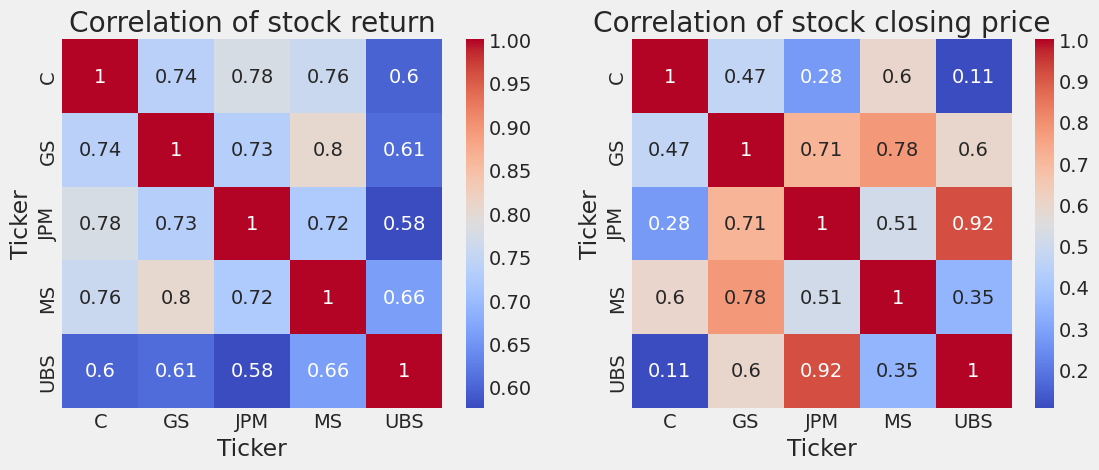

In [ ]:
# Correlation plot to get actual numerical values

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(FIB_ret.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock closing price')

By comparing the closing prices and daily returns, we see an interesting relationship between Morgan Stanley and Goldman Sachs. This correlation suggests that the stock prices of GS and MS tend to move in a similar direction over time. Investors and analysts use such insights to assess the level of interconnectedness between companies within the same sector or industry.

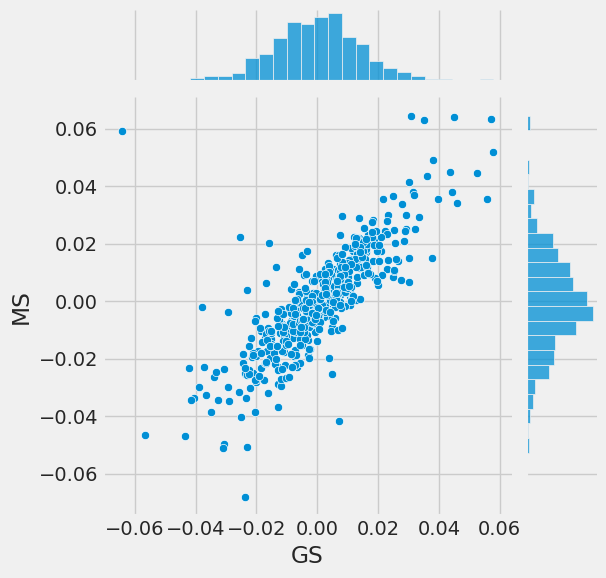

In [ ]:
# Getting closer look on Goldman Sachs & Morgan Stanley

sns.jointplot(x='GS', y='MS', data=FIB_ret, kind='scatter')

## 5. How much value do we put at risk by investing in a particular stock?

We can quantify risk by many ways, one of the most basic ways is using the information we've gathered on daily percentage returns and comparing it by the expected return with the standard deviation of the daily returns.

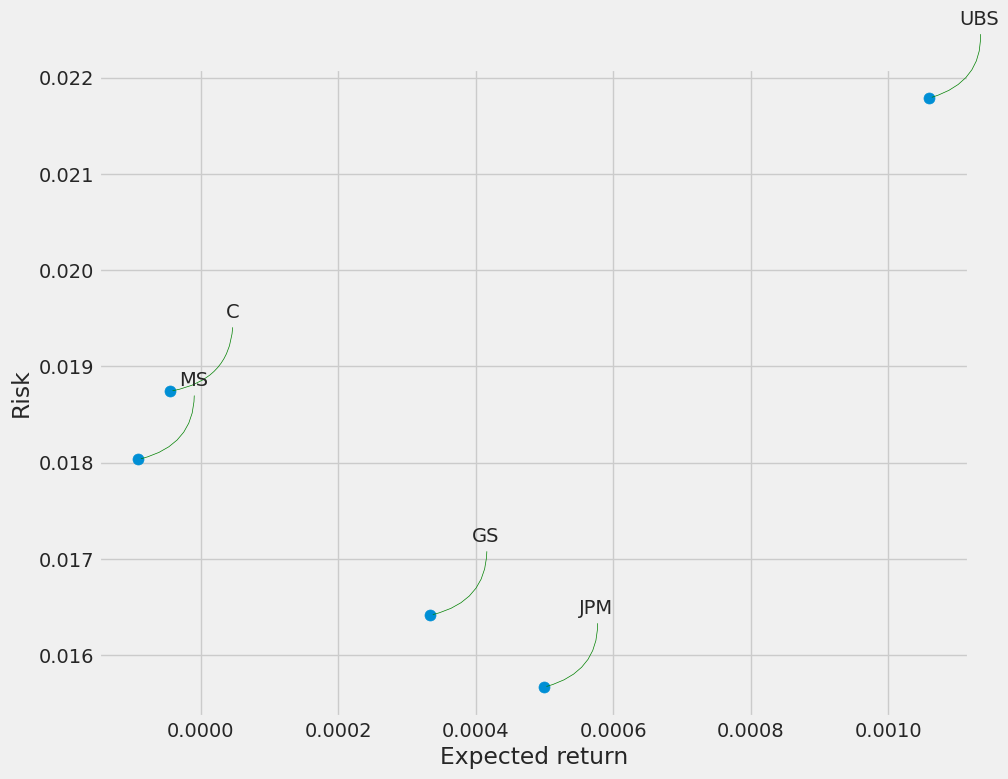

In [ ]:
returns = FIB_ret.dropna()

area = np.pi*20

plt.figure(figsize=(10,8))
plt.scatter(returns.mean(),returns.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='green', connectionstyle='arc3,rad=-0.45'))

Here, we can see that UBS, is the only stock with highest risk and highest expected return. Let's predict the closing price of UBS Group.

## Predicting the closing price stock price of UBS Group:

In [ ]:
# Get the stock quote
dfUBS = pdr.get_data_yahoo('UBS', start='2010-01-01', end='2023-11-01')
# Show the data
dfUBS

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.840000,16.190001,15.790000,16.020000,11.761003,4363800
2010-01-05,16.160000,16.219999,15.970000,16.139999,11.849098,3817600
2010-01-06,16.030001,16.150000,15.960000,16.090000,11.812393,2643600
2010-01-07,16.070000,16.280001,15.980000,16.150000,11.856440,2753500
2010-01-08,16.629999,16.790001,16.540001,16.740000,12.289586,4152900
...,...,...,...,...,...,...
2023-10-25,23.860001,23.995001,23.665001,23.790001,23.790001,1870200
2023-10-26,23.709999,23.855000,23.545000,23.600000,23.600000,2632800
2023-10-27,23.660000,23.693001,23.280001,23.360001,23.360001,2178200


In [ ]:
dfUBS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.840000,16.190001,15.790000,16.020000,11.761003,4363800
2010-01-05,16.160000,16.219999,15.970000,16.139999,11.849098,3817600
2010-01-06,16.030001,16.150000,15.960000,16.090000,11.812393,2643600
2010-01-07,16.070000,16.280001,15.980000,16.150000,11.856440,2753500
2010-01-08,16.629999,16.790001,16.540001,16.740000,12.289586,4152900


In [ ]:
dfUBS.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-08,24.760000,25.025000,24.745001,24.780001,24.780001,2634700
2023-11-09,24.780001,24.885000,24.500000,24.510000,24.510000,2270800
2023-11-10,24.440001,24.545000,24.230000,24.540001,24.540001,1334700
2023-11-13,24.120001,24.299999,24.070000,24.110001,24.110001,1968200
2023-11-14,24.400000,24.959999,24.379999,24.889999,24.889999,3016600


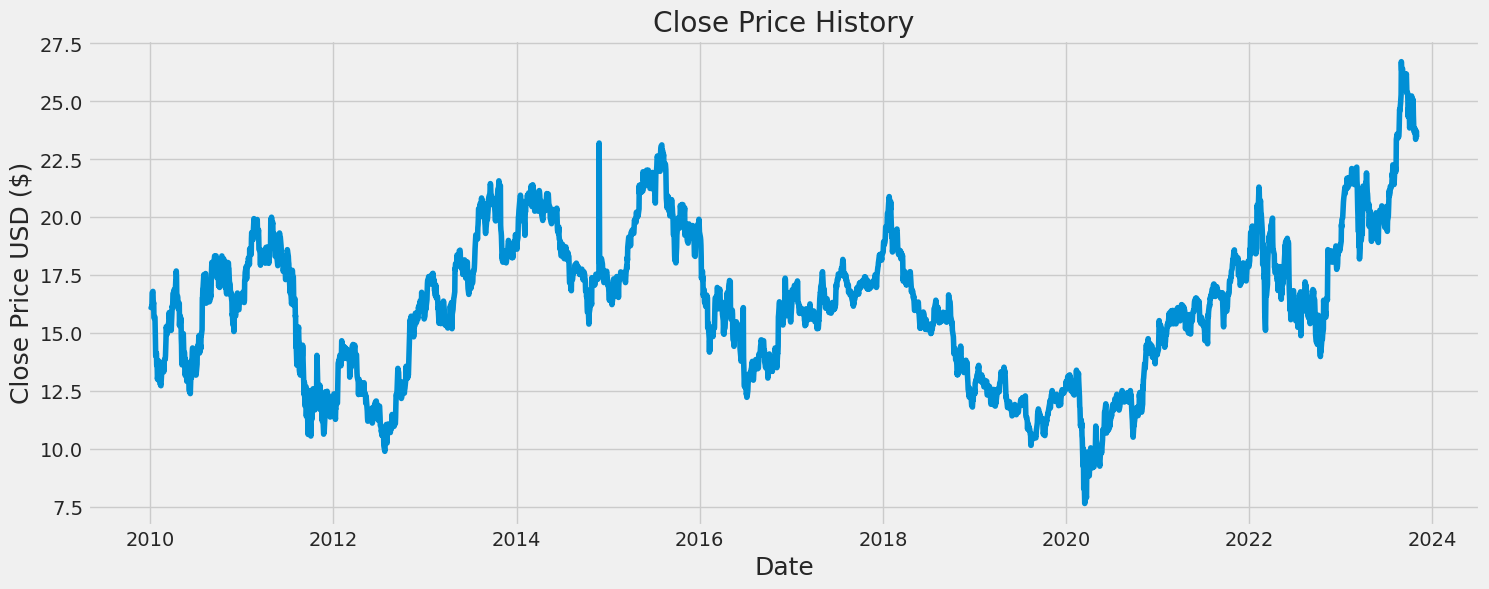

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dfUBS['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Create a new dataframe with only the 'Close' column and convert it to a numpy array. Determine the number of rows for training the model, considering 95% of the dataset.


In [ ]:
# Create a new dataframe with only the 'Close column
data = dfUBS.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3307

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.4391396 ],
       [0.44543545],
       [0.4428122 ],
       ...,
       [0.82423932],
       [0.8426023 ],
       [0.82948583]])

Scaling the data is important because it brings all feature values into the same range, typically between 0 and 1. This ensures that the model can learn effectively without being influenced by the magnitude of the features, especially when using algorithms sensitive to feature scaling like neural networks or support vector machines.

# LSTM Model

**Explanation:**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to overcome the limitations of traditional RNNs in capturing long-term dependencies in sequential data. LSTMs are widely used in tasks involving sequential data such as time series prediction, natural language processing, and speech recognition.

**Simple Example:**

Imagine you are reading a story, and you need to remember important information from previous chapters to understand the current one. However, as the story progresses, you may forget some details from earlier chapters. LSTMs work like a smart reader who can remember important plot points and characters throughout the entire book, allowing them to understand the story better as it unfolds. This helps in predicting what might happen next in the story based on what has already been read.

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.4391396 , 0.44543545, 0.4428122 , 0.44596012, 0.47691501,
       0.48006294, 0.45750269, 0.45225608, 0.45435466, 0.42025185,
       0.42182581, 0.39716687, 0.36778595, 0.33368313, 0.3405037 ,
       0.31269674, 0.31689401, 0.30954881, 0.28121723, 0.29695701,
       0.31269674, 0.32266529, 0.27806925, 0.28646379, 0.27229802,
       0.27072406, 0.27124868, 0.26705141, 0.26652674, 0.31007349,
       0.30954881, 0.31532005, 0.30745018, 0.31951731, 0.2980063 ,
       0.31741868, 0.32056666, 0.32581322, 0.32633789, 0.3342078 ,
       0.35309551, 0.36988458, 0.4003148 , 0.39087097, 0.38352573,
       0.38824766, 0.39087097, 0.40346277, 0.409234  , 0.42444911,
       0.43231903, 0.41920255, 0.42392444, 0.41290665, 0.41657925,
       0.40083947, 0.39192026, 0.41028335, 0.44700947, 0.44333687])]
[0.45278074758613684]

[array([0.4391396 , 0.44543545, 0.4428122 , 0.44596012, 0.47691501,
       0.48006294, 0.45750269, 0.45225608, 0.45435466, 0.42025185,
       0.42182581, 0.39716687, 0.36

(3247, 60, 1)

Now we will build an LSTM model using Keras.

**We will use something called 'epochs', what is it?**

The epochs parameter specifies the number of times the entire dataset is passed forward and backward through the neural network during training. Choosing the correct number of epochs is essential as too few epochs may result in underfitting, while too many epochs may lead to overfitting, where the model memorizes the training data and performs poorly on unseen data.







In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3247/3247 [==============================] - 177s 53ms/step - loss: 0.0015


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 34ms/step


0.6579268779622879

The output indicates the root mean squared error (RMSE) of the LSTM model's predictions on the testing dataset, which is approximately 0.6579. This metric quantifies the difference between predicted and actual values, with lower RMSE values indicating better model performance.

**Did you know?**

RMSE penalizes larger errors more significantly than smaller errors due to its squared nature. This means that outliers or large deviations between predicted and actual values have a more pronounced impact on the RMSE, making it sensitive to extreme values in the dataset. Understanding this aspect can help in assessing the overall performance of a predictive model and interpreting the significance of RMSE values in relation to the specific problem domain.

## Visualizing our Prediction

<ipython-input-28-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


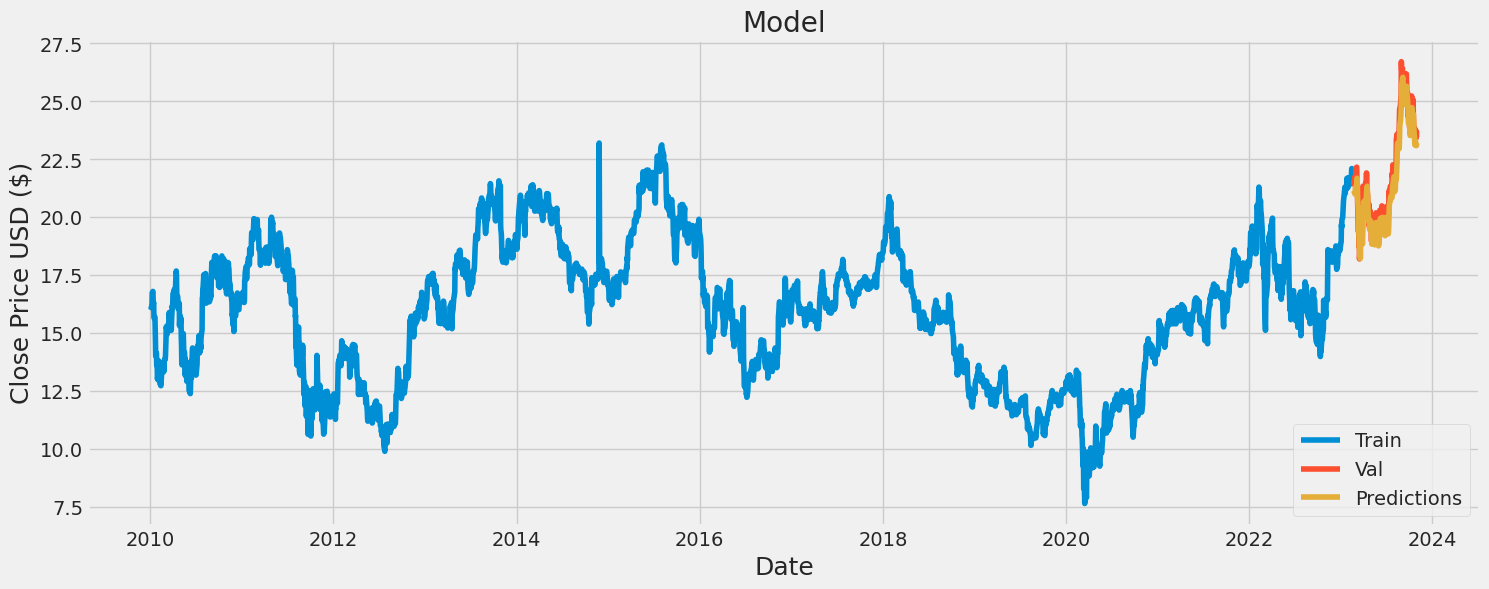

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

The plot displays the historical closing prices of the stock (train data) and the predicted closing prices (validation data) generated by the LSTM model. The blue line represents the actual closing prices from the training dataset, while the orange line represents both the actual closing prices and the predicted closing prices for the validation dataset. The model's predictions are overlaid on the actual data to visualize how closely they align.

## Making the predicted trend more Interactive using PLotly

Now we are going to visualize the predicted closing prices along with the actual closing prices using an interactive line chart created with Plotly Express. This chart will provide hover information, allowing for detailed examination of the predicted and actual prices.

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

# Plot only the predicted close prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plotly Express Line Chart
fig = px.line(data_frame=valid, x=valid.index, y=['Close', 'Predictions'],
              labels={'value': 'Close Price USD ($)'},
              title='Model Prediction with Hover Info')

# Show the interactive plot
fig.show()

<ipython-input-36-a1bbc6a60ffa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


## Calculating the Accuracy of our Prediction

After plotting the predicted closing prices using Plotly Express, the next step is to integrate these predictions into the original dataframe. By doing so, we can compare them directly with the actual closing prices. This comparison enables us to calculate the Mean Absolute Percentage Error (MAPE), a metric used to assess the accuracy of the predictions.

In [ ]:
# Create a new dataframe with dates from the original dataframe
predicted_df = dfUBS[training_data_len:].copy()
predicted_df['Predicted_Close'] = predictions

# Display the new dataframe
print(predicted_df[['Close', 'Predicted_Close']])

                Close  Predicted_Close
Date                                  
2023-02-23  21.629999        21.138834
2023-02-24  21.410000        21.091242
2023-02-27  21.730000        21.000322
2023-02-28  21.780001        21.132050
2023-03-01  21.610001        21.285995
...               ...              ...
2023-10-25  23.790001        23.172754
2023-10-26  23.600000        23.271631
2023-10-27  23.360001        23.247314
2023-10-30  23.709999        23.086832
2023-10-31  23.459999        23.182348

[174 rows x 2 columns]


Finally, we display the dataframe containing both the actual and predicted closing prices, along with the calculated MAPE and overall accuracy percentage.

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
predicted_df['MAPE'] = abs((predicted_df['Close'] - predicted_df['Predicted_Close']) / predicted_df['Close']) * 100

# Calculate accuracy (100% - MAPE)
accuracy = 100 - predicted_df['MAPE'].mean()

# Display the new dataframe with MAPE and accuracy
print(predicted_df[['Close', 'Predicted_Close', 'MAPE']])
print(f'Accuracy: {accuracy:.2f}%')

                Close  Predicted_Close      MAPE
Date                                            
2023-02-23  21.629999        21.138834  2.270759
2023-02-24  21.410000        21.091242  1.488828
2023-02-27  21.730000        21.000322  3.357926
2023-02-28  21.780001        21.132050  2.974982
2023-03-01  21.610001        21.285995  1.499330
...               ...              ...       ...
2023-10-25  23.790001        23.172754  2.594563
2023-10-26  23.600000        23.271631  1.391395
2023-10-27  23.360001        23.247314  0.482389
2023-10-30  23.709999        23.086832  2.628288
2023-10-31  23.459999        23.182348  1.183507

[174 rows x 3 columns]
Accuracy: 97.54%


The overall accuracy of the predictions, calculated as 100% minus the mean MAPE, is also provided, indicating the model's performance. In this case, the accuracy is reported as 97.54%. Which is awesome, isn't it?

## Conclusion

In conclusion, we successfully developed an LSTM neural network model to predict the closing prices of a stock based on historical data. The model demonstrated promising results, achieving a high level of accuracy in predicting future price movements. By leveraging the power of deep learning algorithms, we have provided investors and financial professionals with a valuable tool for making informed investment decisions. Moving forward, further research and refinement of the model could lead to even greater accuracy and reliability, offering enhanced insights into stock market dynamics and trends.